
# Project: Investigate a Dataset (TMDb Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**:
 Overview
To complete my Data Analysis project I will be using the TMDb movie dataset.

This dataset contains information about 10 thousand movies including user ratings and revenue, this dataset collected from The Movie Database (TMDb). It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

Questions:
1-what most frequenst run time


2-in which year we had most no.of profitable movies

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> 


1-first we see first 5 row





2-second we see some statistic




3- see shape of dataset






4-see number of unique in each column




5-see if dublicated occur




### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('tmdb-movies.csv')
df.head()
#   types and look for instances of missing or possibly errant data.


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#get some information about dataset and check for NAN value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#return number of unique value in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
# check for duplicated 
sum(df.duplicated())

1

In [12]:
#check if column  in correct format or not
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [ ]:
#check for na
df.isna().sum()

In [8]:
#show some usefull descriptive statistic for each column
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 
1-drop duplicated rows










2-drop unnecessary column









3-removing 0 from budget and revenue












4-change the release_date from string to a datetime














 
5-replace 0 with NAN in runtime

















6-change format for budget,revenue to int64
remove duplicated

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#solve first problem by converting string to datetime
df.release_date = pd.to_datetime(df['release_date'])

In [15]:
#show that release date in coorect format
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
#solve second problem duplicated row 
df.drop_duplicates(keep ='first', inplace=True)

In [16]:
#show that no duplicated
sum(df.duplicated())

0

In [13]:
#solve third problem na value by use built in function fillna
df['homepage'].fillna('Others', inplace = True)
df['tagline'].fillna('Others', inplace = True)
df['keywords'].fillna('Others', inplace = True)
df['production_companies'].fillna('Others', inplace = True)
df['overview'].fillna('Others', inplace = True)
df['cast'].fillna('Others', inplace = True)
df['genres'].fillna('Others', inplace = True)

In [14]:
#show information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10865 non-null object
homepage                10865 non-null object
director                10821 non-null object
tagline                 10865 non-null object
keywords                10865 non-null object
overview                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj   

In [21]:
#solve problem of unnessary column
df.drop(['homepage','tagline','overview','keywords'], axis=1,inplace=True)

In [22]:
#show data
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [30]:
m=df['budget'].mean()
df['budget'].replace(0,m)

0        1.500000e+08
1        1.500000e+08
2        1.100000e+08
3        2.000000e+08
4        1.900000e+08
5        1.350000e+08
6        1.550000e+08
7        1.080000e+08
8        7.400000e+07
9        1.750000e+08
10       2.450000e+08
11       1.760000e+08
12       1.500000e+07
13       8.800000e+07
14       2.800000e+08
15       4.400000e+07
16       4.800000e+07
17       1.300000e+08
18       9.500000e+07
19       1.600000e+08
20       1.900000e+08
21       3.000000e+07
22       1.100000e+08
23       4.000000e+07
24       2.800000e+07
25       1.500000e+08
26       6.800000e+07
27       8.100000e+07
28       2.000000e+07
29       6.100000e+07
             ...     
10836    1.462429e+07
10837    1.462429e+07
10838    1.462429e+07
10839    1.462429e+07
10840    1.462429e+07
10841    7.500000e+04
10842    1.462429e+07
10843    1.462429e+07
10844    1.462429e+07
10845    1.462429e+07
10846    1.462429e+07
10847    1.462429e+07
10848    5.115000e+06
10849    1.462429e+07
10850    1

In [31]:
m1=df['revenue'].mean()
df['revenue'].replace(0,m1)

0        1.513529e+09
1        3.784364e+08
2        2.952382e+08
3        2.068178e+09
4        1.506249e+09
5        5.329505e+08
6        4.406035e+08
7        5.953803e+08
8        1.156731e+09
9        8.537086e+08
10       8.806746e+08
11       1.839877e+08
12       3.686941e+07
13       2.436371e+08
14       1.405036e+09
15       1.557601e+08
16       3.257714e+08
17       5.186022e+08
18       5.423514e+08
19       6.505234e+08
20       2.090357e+08
21       9.170983e+07
22       4.704908e+08
23       5.696515e+08
24       1.333465e+08
25       6.823301e+08
26       2.158636e+08
27       4.038021e+08
28       8.834647e+07
29       3.112569e+08
             ...     
10836    3.982690e+07
10837    3.982690e+07
10838    3.982690e+07
10839    3.982690e+07
10840    3.982690e+07
10841    3.982690e+07
10842    3.982690e+07
10843    3.982690e+07
10844    3.982690e+07
10845    3.982690e+07
10846    3.982690e+07
10847    3.982690e+07
10848    1.200000e+07
10849    3.982690e+07
10850    3

In [37]:
#change type from float64 to int64
df['budget']=df['budget'].astype(np.int64)

In [38]:
#change type from float64 to int64
df['revenue']=df['revenue'].astype(np.int64)

In [39]:
#replace 0 with NAN in run time
df['runtime'] = df['runtime'].replace(np.nan, 0)

<a id='eda'></a>
## Exploratory Data Analysis

> 

### Research Question 1 (most frequenst run time)
1-we use some statistaic in run time 'mean',std to know about it more














2- second we use histgram to know what frequency for each value in it

















3-we use boxplot to know min and max range and to check for not occur outlier

In [43]:
#get mean of runtime 
df['runtime'].mean()


102.07086324314375

In [44]:
#get standerd divesion for run time
df['runtime'].std()

31.381405082206367

In [50]:
df['runtime'].describe()

count    10866.000000
mean       102.070863
std         31.381405
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

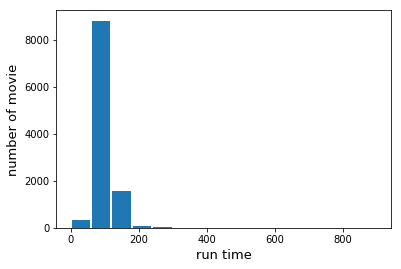

In [45]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#know we use histogram to know what most frequenst run time 
plt.xlabel('run time',fontsize=13)
plt.ylabel('number of movie',fontsize=13)
plt.hist(df['runtime'], rwidth = 0.9, bins =15)
#displays the plot
plt.show()

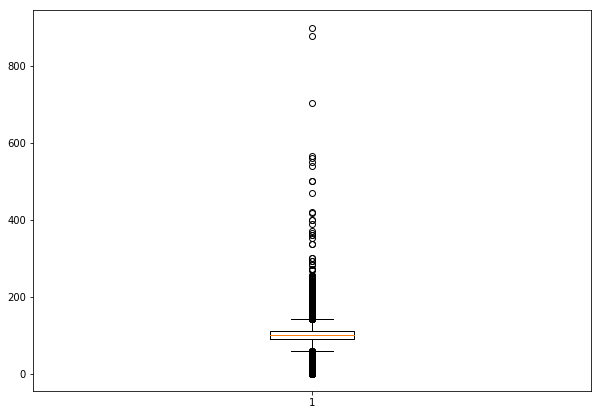

In [47]:
fig = plt.figure(figsize =(10, 7))
# Creating plot 
plt.boxplot(df['runtime']) 
# show plot 
plt.show() 

### Research Question 2  (in which year we had most no.of profitable movies)
first we calculate profit column












second we insert profit column in index 2 in dataset












third we plot column to show result clear

In [4]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
#calculate profit
df.insert(2,'profit',df['revenue']-df['budget'])

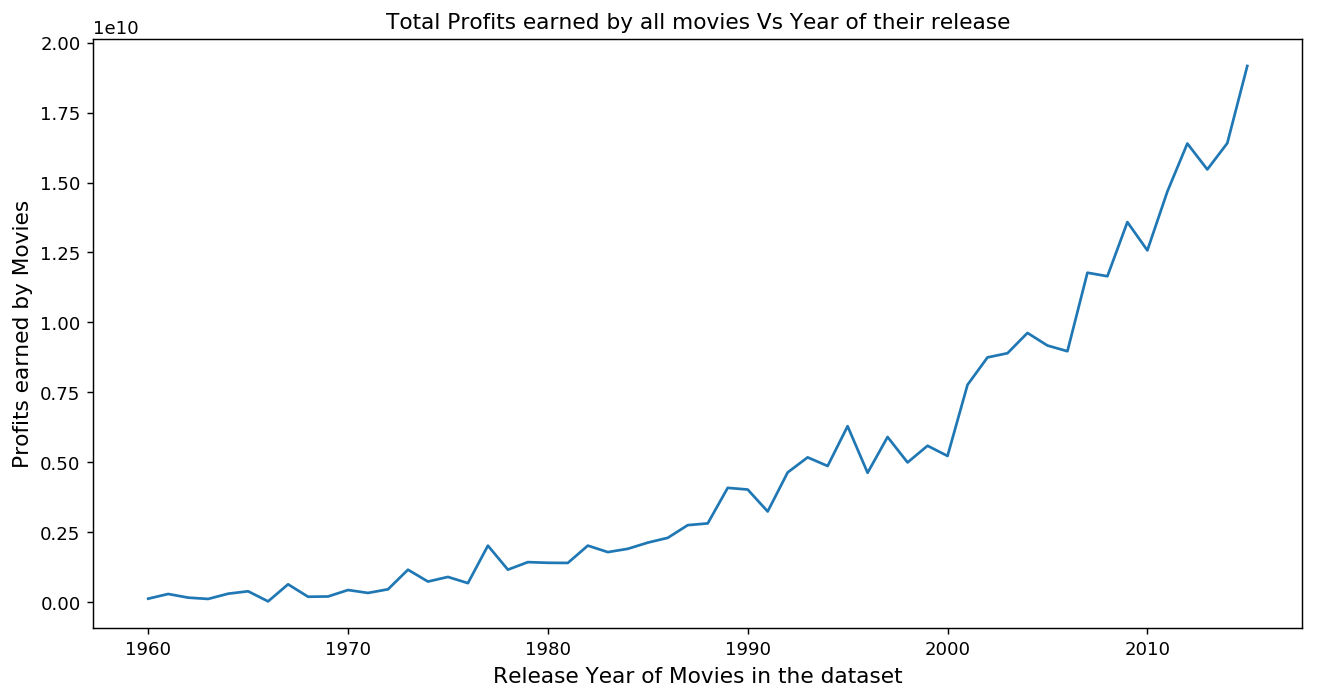

In [18]:
pyear = df.groupby('release_year')['profit'].sum()


plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release Year of Movies in the dataset', fontsize = 12)
plt.ylabel('Profits earned by Movies', fontsize = 12)
plt.title('Total Profits earned by all movies Vs Year of their release')

plt.plot(pyear)

plt.show()

In [ ]:
% matplotlib inline
from pandas.plotting import scatter_matrix

pd.plotting.scatter_matrix(df, figsize = [12,12])


## Conclusions
comment in analysis










1-get mean and std to know distribution of run time and to sure from histogram result
















2-profit not included in my dataset but it can be calculated so we may use column that not included but we interested in it


In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0